In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier


colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [ ]:
df = pd.read_csv("shopping_trends_updated.csv")
df.head(10)

FileNotFoundError: ignored

In [ ]:
df.shape

(3900, 18)

In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [ ]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Visualization

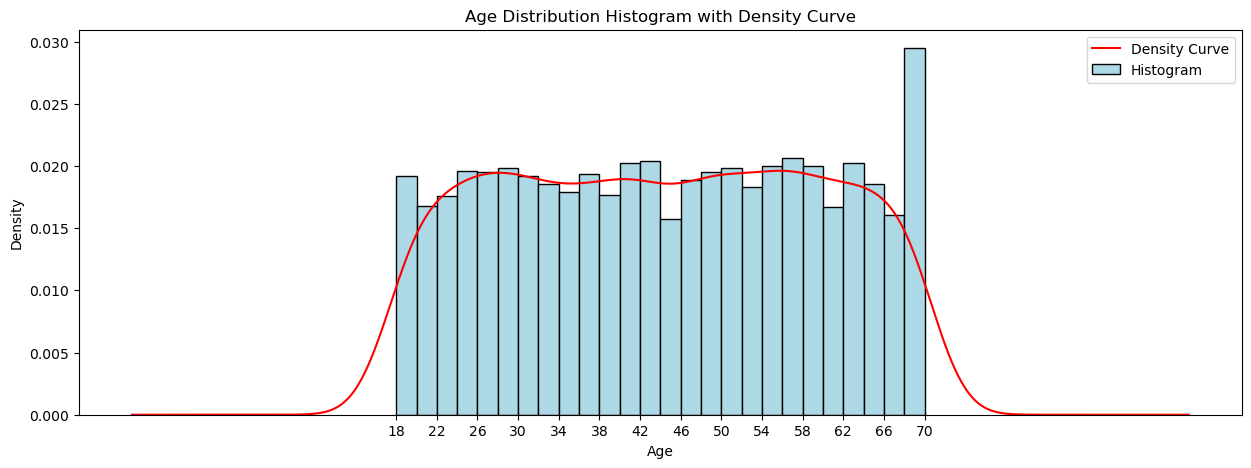

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.hist(df['Age'], bins = 26, edgecolor = 'black', color = 'lightblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
step = 4
plt.xticks(range(int(df['Age'].min()), int(df['Age'].max()) + 1, step))

plt.show()

1.GENDER

In [ ]:
df["Gender"].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

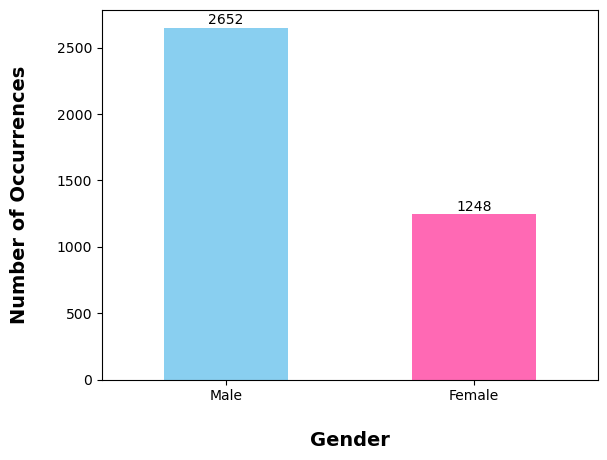

In [ ]:
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot=0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
plt.xlabel('Gender', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);

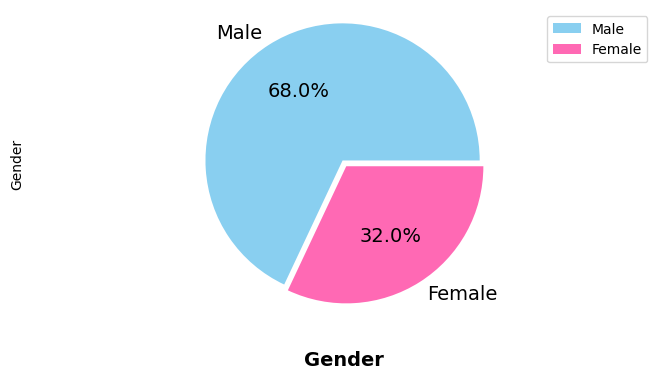

In [ ]:
plt.figure(figsize = (8, 4))
counts = df["Gender"].value_counts()
explode = (0, 0.05)

counts.plot(kind = 'pie', fontsize = 14, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

2. Category

In [ ]:
df["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

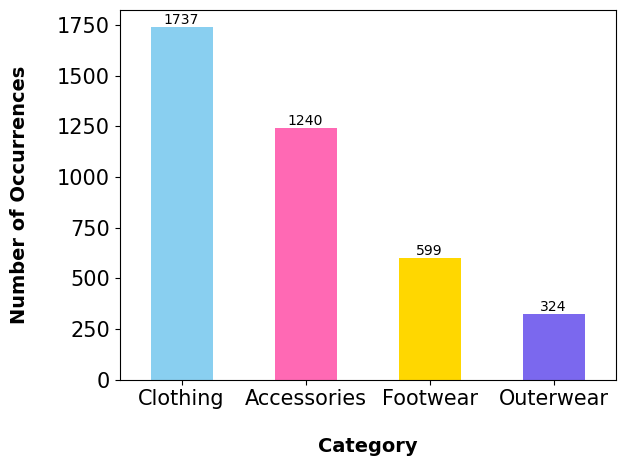

In [ ]:
ax = df["Category"].value_counts().plot(kind = 'bar',color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Category', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);

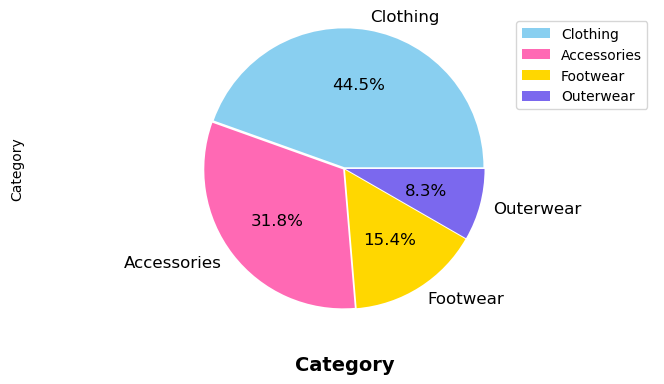

In [ ]:
plt.figure(figsize = (8, 4))
counts = df["Category"].value_counts()

counts.plot(kind='pie', fontsize=12, colors=colors, explode=(0.01, 0.01, 0.01, 0.01), autopct='%1.1f%%')
plt.xlabel('Category', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

3.LOCATION

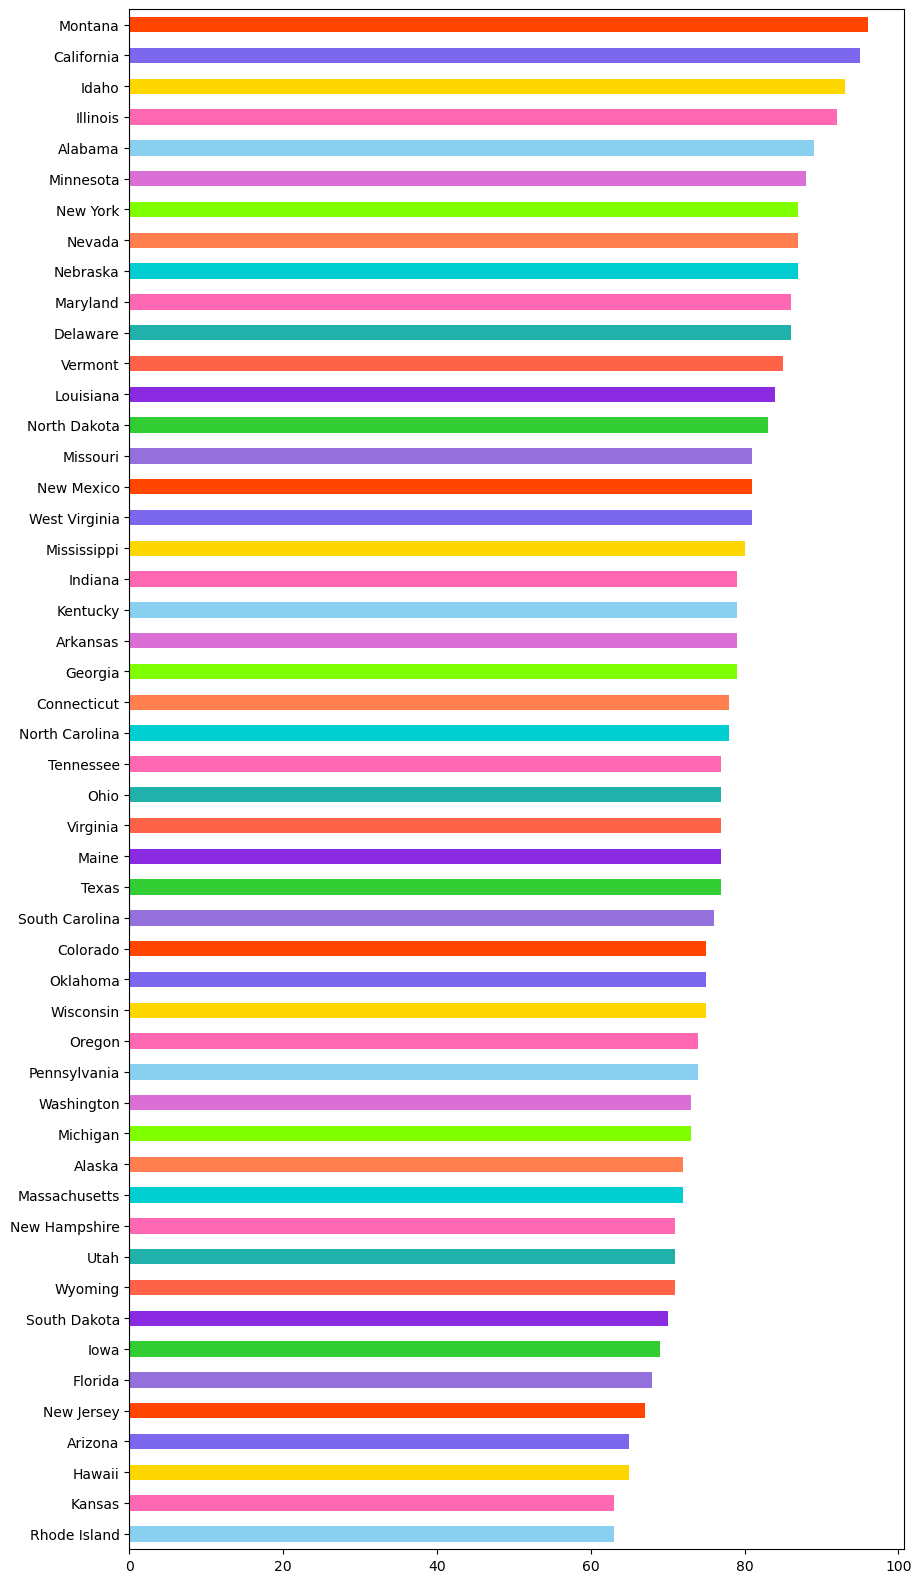

In [ ]:
plt.figure(figsize=(10, 20))
df.Location.value_counts(ascending=True).plot(kind='barh',color=colors)
plt.show()

4.Size

In [ ]:
df["Size"].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

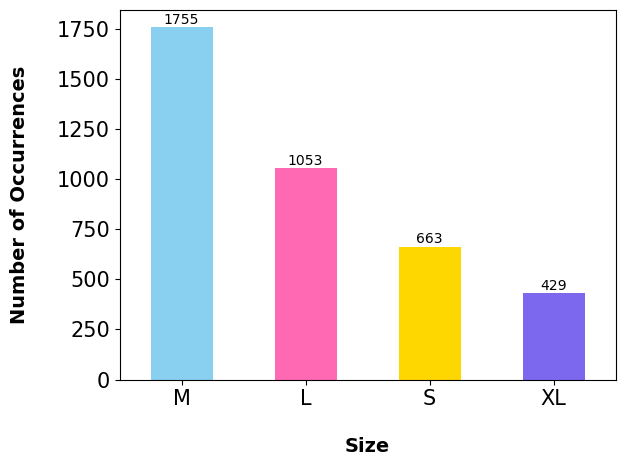

In [ ]:
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('M', 'L', 'S', 'XL'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);

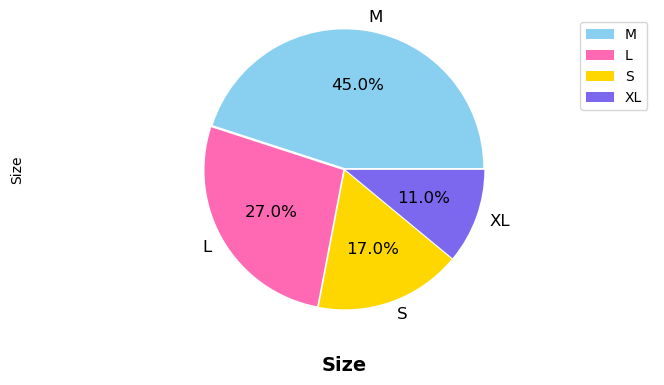

In [ ]:
plt.figure(figsize = (8, 4))

counts = df["Size"].value_counts()

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0.01, 0.01, 0.01, 0.01), autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

5.Seasons

In [ ]:
df["Season"].value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

Analyse

In [ ]:
average_age = df['Age'].mean()
print("Average age:", average_age)

Average age: 44.06846153846154


In [ ]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("total purchaseby categories:")
print(total_purchase_by_category)

total purchaseby categories:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [ ]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("most common payement method:", most_common_payment_method)

most common payement method: PayPal


In [ ]:
sns.pairplot(df,hue='Gender')